In [16]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Length of period:
len_period = 4.2 # m

# Load data from output txt file:
file = 'trace-sim/ReferenceParticle.txt'
# file = 'Automate-G4bl/g4bl-output-sim1/ReferenceParticle.txt'
data = np.loadtxt(file)

# Figure directory:
dir = 'Figures/'

In [17]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []; mod_t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
count = 0; count2 = 0
for i in range(data.shape[0]):
    x_vals.append(data[i][0]*0.1) # mm -> cm
    y_vals.append(data[i][1]*0.1)
    z = data[i][2]*0.001 # mm -> m
    # z = data[i][2]*0.001-0.7 # mm -> m and add shift to fix initial offset
    z_vals.append(z) # mm -> m and add shift to fix initial offset
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    t = data[i][6]
    t_vals.append(t) # ns
    mod_t = t % T
    mod_t_vals.append(mod_t)
    # Bx = data[i][12]; By = data[i][13]; Bz = data[i][14]
    Bx = data[i][12]*200; By = data[i][13]*200; Bz = data[i][14] # rescale Bx, By for plotting
    Bx_vals.append(Bx)
    By_vals.append(By)
    Bz_vals.append(Bz)
    del px, py, pz, t, Bx, By, Bz

    # z = data[i][2]*0.001-0.7
    # if z == 0:
    #     print(z)
    #     print(i)
    # if z > 4.20 and z < 4.21:
    #     print(z)
    #     print(i)
    # if z > 8.40 and z < 8.41:
    #     print(z)
    #     print(i)

    # Find index for last value in first and second periods:
    if z > len_period and count == 0:
        end_first_period = i
        count += 1
    if z > 2*len_period and count2 == 0:
        end_second_period = i
        count2 += 1

In [18]:
print('Initial z: '+str(z_vals[0]))
print('Final z: '+str(z_vals[len(z_vals)-1]))
# ADD SHIFT OF -700 mm TO Z VALUES (FROM INITIAL BEAM OFFSET)

Initial z: 0.0
Final z: 48.5106


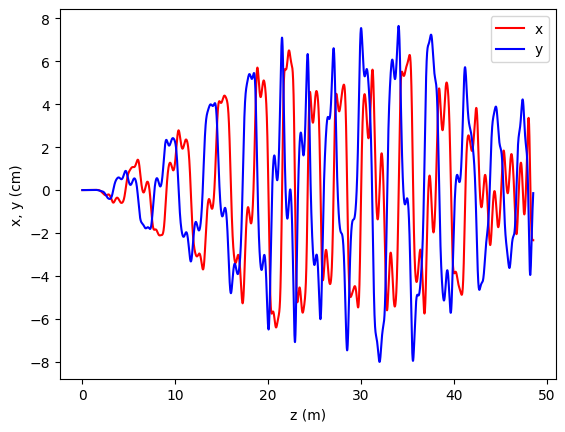

In [19]:
# Plot x, y along z:
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
# lim = 800
# plt.plot(z_vals[:lim],x_vals[:lim],color='red',label='x')
# plt.plot(z_vals[:lim],y_vals[:lim],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()

Text(0, 0.5, 'y (cm)')

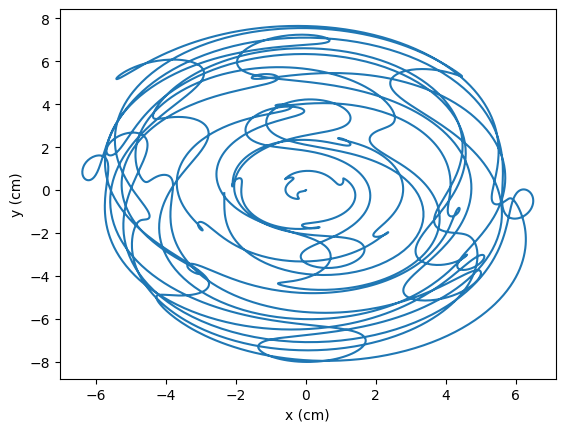

In [20]:
# Plot projection in x-y plane:
plt.plot(x_vals,y_vals)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

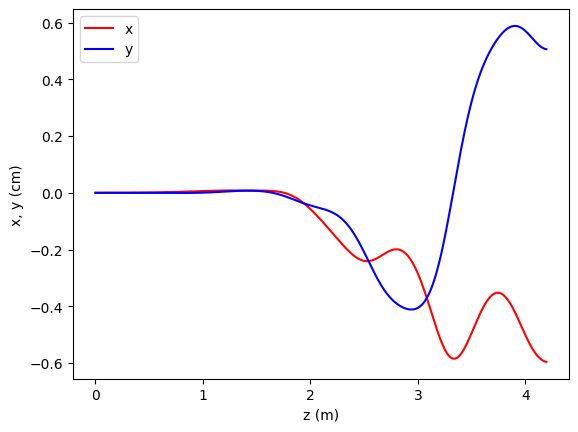

In [21]:
# Plot first period of data:
plt.plot(z_vals[0:end_first_period],x_vals[0:end_first_period],color='red',label='x')
plt.plot(z_vals[0:end_first_period],y_vals[0:end_first_period],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()

Text(0, 0.5, 'y (cm)')

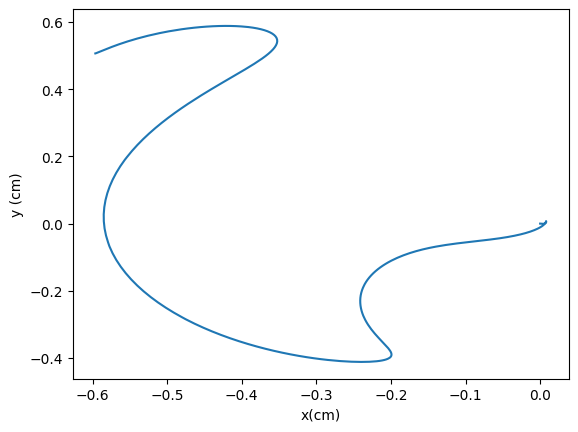

In [22]:
# Plot x-y trajectory for first period of data:
plt.plot(x_vals[0:end_first_period],y_vals[0:end_first_period])
plt.xlabel('x(cm)')
plt.ylabel('y (cm)')

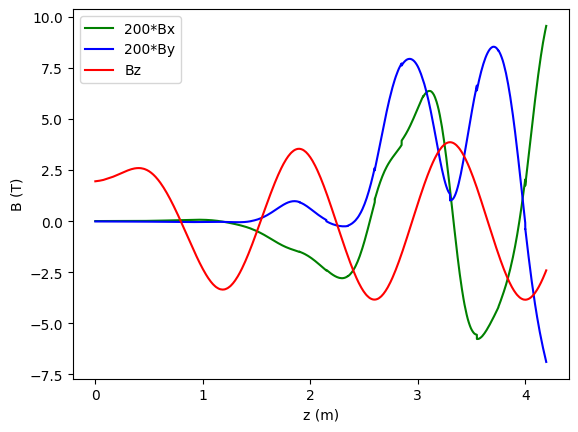

In [23]:
# Plot magnetic field for a first period of data:
plt.plot(z_vals[0:end_first_period],Bx_vals[0:end_first_period],color='green',label='200*Bx')
plt.plot(z_vals[0:end_first_period],By_vals[0:end_first_period],color='blue',label='200*By')
plt.plot(z_vals[0:end_first_period],Bz_vals[0:end_first_period],color='red',label='Bz')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()

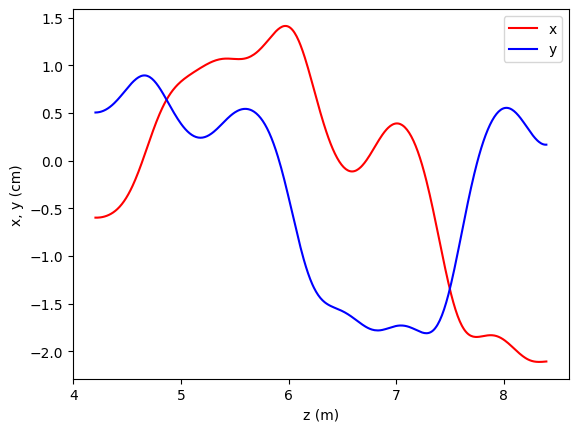

In [24]:
# Plot second period of data:
plt.plot(z_vals[end_first_period:end_second_period],x_vals[end_first_period:end_second_period],color='red',label='x')
plt.plot(z_vals[end_first_period:end_second_period],y_vals[end_first_period:end_second_period],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()

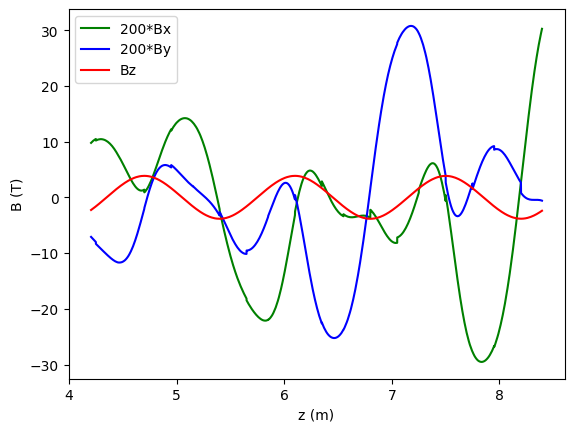

In [25]:
# Plot magnetic field for a second period of data:
plt.plot(z_vals[end_first_period:end_second_period],Bx_vals[end_first_period:end_second_period],color='green',label='200*Bx')
plt.plot(z_vals[end_first_period:end_second_period],By_vals[end_first_period:end_second_period],color='blue',label='200*By')
plt.plot(z_vals[end_first_period:end_second_period],Bz_vals[end_first_period:end_second_period],color='red',label='Bz')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()

Text(0, 0.5, 'y (cm)')

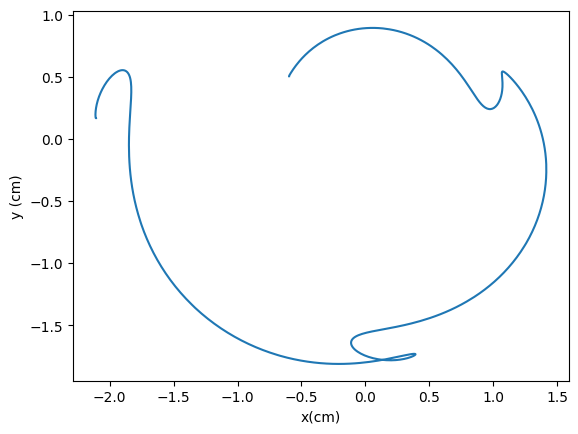

In [26]:
# Plot x-y trajectory for second period of data:
plt.plot(x_vals[end_first_period:end_second_period],y_vals[end_first_period:end_second_period])
plt.xlabel('x(cm)')
plt.ylabel('y (cm)')

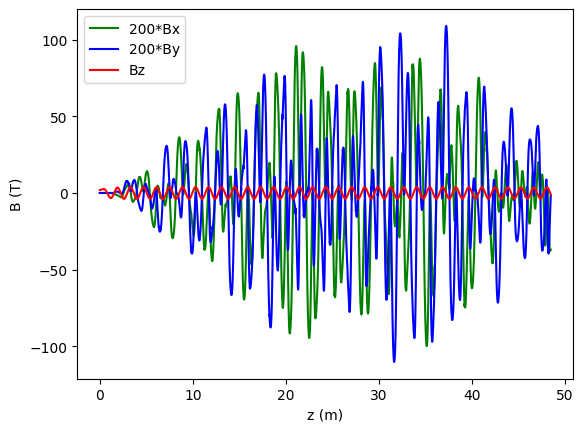

In [27]:
# Plot magnetic field for entire channel:
plt.plot(z_vals,Bx_vals,color='green',label='200*Bx')
plt.plot(z_vals,By_vals,color='blue',label='200*By')
plt.plot(z_vals,Bz_vals,color='red',label='Bz')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()

In [28]:
# Load data from paper -- for single period:
dir = '/Users/criggall/Documents/muon-cooling/'
xdata = np.genfromtxt(dir+'paper_x_vs_z.csv',delimiter=',')
xdata_x = []; xdata_z = []
for i in range(len(xdata)):
    xdata_z.append(xdata[i][0])
    xdata_x.append(xdata[i][1])
ydata = np.genfromtxt(dir+'paper_y_vs_z.csv',delimiter=',')
ydata_y = []; ydata_z = []
for i in range(len(ydata)):
    ydata_z.append(ydata[i][0])
    ydata_y.append(ydata[i][1])

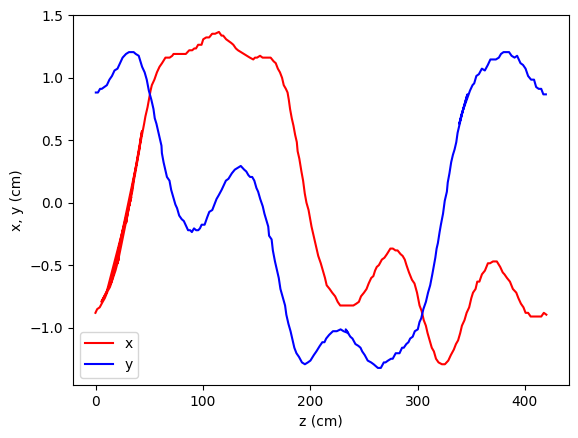

In [29]:
# Plot x, y along z from paper -- for single period:
plt.plot(xdata_z,xdata_x,color='red',label='x')
plt.plot(ydata_z,ydata_y,color='blue',label='y')
# plt.plot(xdata_z,xdata_x,color='red',label='x',marker='.')
# plt.plot(ydata_z,ydata_y,color='blue',label='y',marker='.')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()

Text(0, 0.5, 'y (cm)')

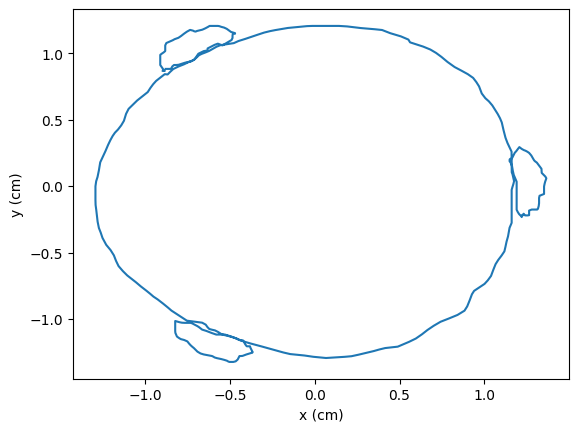

In [30]:
# Plot x-y trajeectory from paper -- for single period:
num = end_second_period - end_first_period
z_range = np.linspace(0,420,round(num,1))
x_interp = np.interp(z_range,xdata_z,xdata_x)
y_interp = np.interp(z_range,ydata_z,ydata_y)
plt.plot(x_interp,y_interp)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

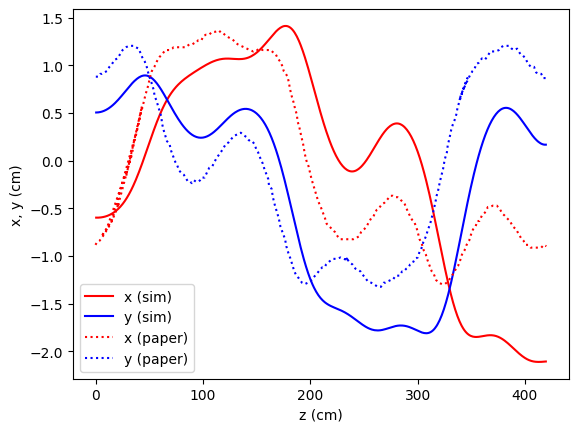

In [31]:
# Subplot trajectory for sim second period vs paper:
positions = z_vals[end_first_period:end_second_period]
for i in range(len(positions)):
    positions[i] = positions[i]*100 - len_period*100
plt.plot(positions,x_vals[end_first_period:end_second_period],color='red',label='x (sim)')
plt.plot(positions,y_vals[end_first_period:end_second_period],color='blue',label='y (sim)')
plt.plot(xdata_z,xdata_x,color='red',label='x (paper)',linestyle=':')
plt.plot(ydata_z,ydata_y,color='blue',label='y (paper)',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()

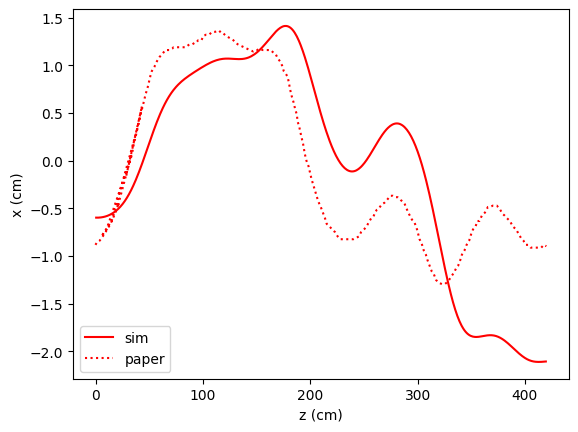

In [32]:
# Subplot trajectory for sim second period vs paper -- just x:
positions = z_vals[end_first_period:end_second_period]
for i in range(len(positions)):
    positions[i] = positions[i]*100 - len_period*100
plt.plot(positions,x_vals[end_first_period:end_second_period],color='red',label='sim')
plt.plot(xdata_z,xdata_x,color='red',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('x (cm)')
plt.legend(loc='lower left')

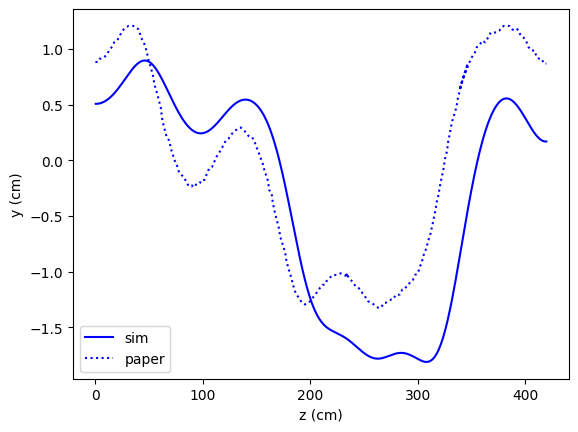

In [33]:
# Subplot trajectory for sim second period vs paper -- just y:
plt.plot(positions,y_vals[end_first_period:end_second_period],color='blue',label='sim')
plt.plot(ydata_z,ydata_y,color='blue',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('y (cm)')
plt.legend(loc='lower left')

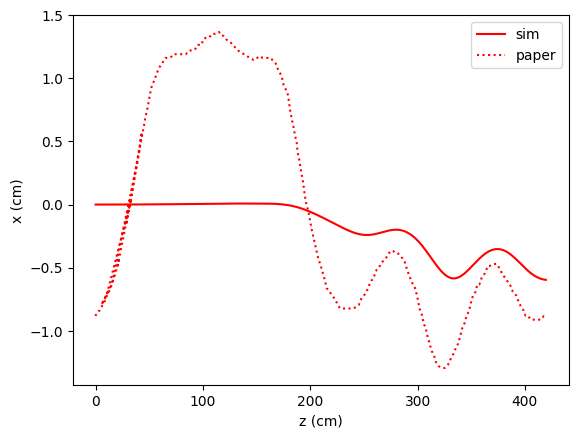

In [34]:
# Subplot trajectory for sim first period vs paper -- just x:
positions = z_vals[0:end_first_period]
for i in range(len(positions)):
    positions[i] = positions[i]*100
plt.plot(positions,x_vals[0:end_first_period],color='red',label='sim')
plt.plot(xdata_z,xdata_x,color='red',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('x (cm)')
plt.legend(loc='upper right')

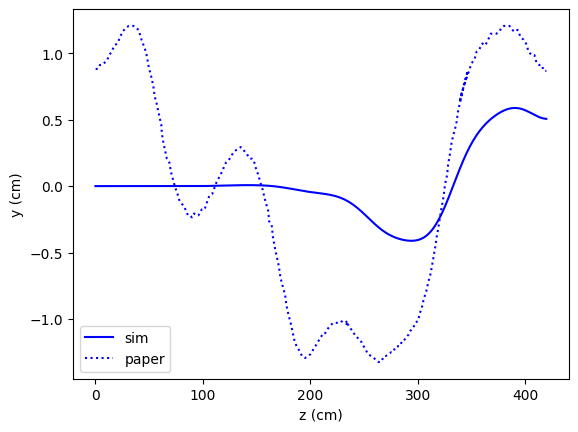

In [35]:
# Subplot trajectory for sim first period vs paper -- just y:
plt.plot(positions,y_vals[0:end_first_period],color='blue',label='sim')
plt.plot(ydata_z,ydata_y,color='blue',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('y (cm)')
plt.legend(loc='lower left')